In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, CSV, DataFrames;

In [2]:
df = CSV.File("../data/Xavier-diode5.csv") |> DataFrame

,VK,IK,JK,LOGVK,LOGJK,LNJK,der,eta
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.017,5.63e-11,2.82e-5,-1.76955,-4.55021,-10.4773,46.2255,0.836119
2,0.033,1.19e-10,5.96e-5,-1.48149,-4.2249,-9.72819,38.2633,1.01011
3,0.05,2.03e-10,0.00010137,-1.30103,-3.99409,-9.19673,29.8035,1.29683
4,0.067,2.98e-10,0.00014917,-1.17393,-3.82632,-8.81042,23.0694,1.67538
5,0.084,4.28e-10,0.000214205,-1.07572,-3.66917,-8.44858,19.8362,1.94846
6,0.1,5.74e-10,0.0002869,-1.0,-3.54227,-8.15638,18.4366,2.09637
7,0.117,7.7e-10,0.000384885,-0.931814,-3.41467,-7.86257,17.4724,2.21207
8,0.134,1.03e-9,0.000517075,-0.872895,-3.28645,-7.56732,16.7371,2.30924
9,0.15,1.36e-9,0.000680405,-0.823909,-3.16723,-7.29282,16.1294,2.39624


Pentacene from Xavier's thesis

In [3]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e4, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
150e-7
);

T = 300;
range = 6:30
F = df.VK[6:30] ./ semiconductor.L

25-element Array{Float64,1}:
  6666.666666666667
  7800.0
  8933.333333333334
 10000.0
 11133.333333333334
 12266.666666666666
 13333.333333333334
 14466.666666666666
 15600.0
 16733.333333333332
 17800.0
 18933.333333333332
 20066.666666666664
 21133.333333333332
 22266.666666666668
 23399.999999999996
 24466.666666666664
 25600.0
 26733.333333333336
 27866.666666666664
 28933.333333333332
 30066.666666666668
 31200.0
 32266.666666666664
 33400.0

`F_reduced` is the range in which the fig. 43 was plot.

In [4]:
F_reduced = [F[5i] for i in 1:Int(floor(length(F) / 5))]

5-element Array{Float64,1}:
 11133.333333333334
 16733.333333333332
 22266.666666666668
 27866.666666666664
 33400.0

In [5]:
function f(F)
    semiconductor.F = -F;
    return Conduction.overallEin(semiconductor, Conduction.RnnVRH, T, 15)
end

simulation_res = f.(F_reduced)

5-element Array{Float64,1}:
 0.033896595263279795
 0.050946379707085196
 0.06779319052655959
 0.084842974970365
 0.1016897857898394

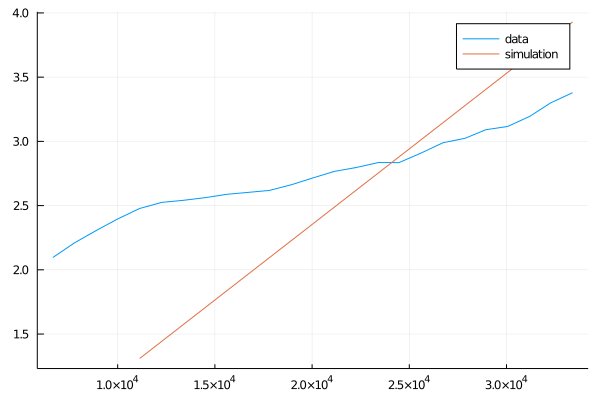

In [7]:
plot([F, F_reduced], [df.eta[range], simulation_res ./ (Conduction.k * T / Conduction.q)], label=["data" "simulation"])

It seems that the real datas and the simulation have the same tendency even though there is a constant shift.